# 순서
### 1. 2-12. 프로젝트1_당뇨병_혈당수치예측
### 2. 2-13. 프로젝트2_자전거대여량 예측
### 3. 회고


# 1. [2-12. 프로젝트1_당뇨병_혈당수치예측 ]

## (1) 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

data = load_diabetes(as_frame=True)
print(type(data), data.keys())
df_x = data.data
df_y = data.target

print(type(df_x), df_x.shape, type(df_y), df_y.shape)
print(df_x.head(5))
print(df_x.info())
print(df_x.describe())
print(df_y)

print(data.DESCR)
print(data.feature_names,data.data_filename, data.target_filename, data.data_module)

<class 'sklearn.utils.Bunch'> dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
<class 'pandas.core.frame.DataFrame'> (442, 10) <class 'pandas.core.series.Series'> (442,)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 # 

## (2) 모델에 입력할 데이터 X 준비하기

In [2]:
x = df_x.values
print(x.shape)

(442, 10)


## (3) 모델에 예측할 데이터 y 준비하기


In [3]:
## target data를 log로 정규화시도: x데이터와 y데이터의 scale이 차이가 커서, target data를 log 처리 
#log_df_y = df_y.map(lambda x: np.log(x) if x > 0 else 0)


In [5]:
#y = log_df_y.values
y = df_y.values
print(y.shape)

(442,)


## (4) train 데이터와 test 데이터로 분리하기

In [6]:
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, random_state = 7)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

## 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Taget data 정규화: 
# (참조) https://yhyun225.tistory.com/11 의 내용중  target data 를 364로 나눈후 해보라고해서 시도해봄 
#y_train = y_train / 346
#y_test = y_test / 346


(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.


In [7]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()
print("W: ",W, '\n', "b: ",b)

def model(X, W, b):
    predictions = 0   
    predictions += X.dot(W)
    
    #for i in range(X.shape[1]):
    #    predictions += X[:, i] * W[i]
    
    predictions += b
    return predictions


W:  [0.34620691 0.99345987 0.23137904 0.75367828 0.87524808 0.87744781
 0.05951382 0.59770054 0.21471391 0.46039113] 
 b:  0.8523112033420879


In [8]:
print(X_train[:20, 0])
print(W)
print(W[0])
wx= X_train[:,0]*W[0]
print(wx[:20])
wx1= X_train[:,0].dot(W[0])
print(wx1[:20])

[ 0.73237793 -0.43392016  0.11035228 -0.58942657 -0.20066054 -0.58942657
 -0.90043939 -0.58942657  0.03259908  0.73237793  0.49911831  0.73237793
  1.12114396  1.5876632   1.35440358  0.03259908  0.88788434  0.81013114
 -0.35616695 -1.36695863]
[0.34620691 0.99345987 0.23137904 0.75367828 0.87524808 0.87744781
 0.05951382 0.59770054 0.21471391 0.46039113]
0.3462069100666637
[ 0.2535543  -0.15022616  0.03820472 -0.20406355 -0.06947007 -0.20406355
 -0.31173834 -0.20406355  0.01128603  0.2535543   0.17279821  0.2535543
  0.38814779  0.54965997  0.46890388  0.01128603  0.30739169  0.280473
 -0.12330746 -0.47325052]
[ 0.2535543  -0.15022616  0.03820472 -0.20406355 -0.06947007 -0.20406355
 -0.31173834 -0.20406355  0.01128603  0.2535543   0.17279821  0.2535543
  0.38814779  0.54965997  0.46890388  0.01128603  0.30739169  0.280473
 -0.12330746 -0.47325052]


## (6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.


In [9]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
    

## (7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [10]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


## (8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.


In [11]:
# 학습율 여러개 시도
LEARNING_RATE_list = [0.3, 0.2, 0.1, 0.07, 0.05,  0.01, 0.001, 0.0001, 0.00001]

## (9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.


Index 0 Iteration 100 : LEARNING_RATE  0.30000  Loss 11935400503259920543686685178766295040.0000
Index 0 Iteration 200 : LEARNING_RATE  0.30000  Loss 85789328953635102603983640017721288035038729589214000360455956313669632.0000
Index 0 Iteration 300 : LEARNING_RATE  0.30000  Loss 616636949912565385713437772184384801870484049587641965907446158452856613828406022005488245665595784167424.0000
Index 0 Iteration 400 : LEARNING_RATE  0.30000  Loss 4432266024635432267053635090027422986892020824398828555760434291131587007976946552457058760827833453759691660397075227008266208263832338432.0000
Index 0 Iteration 500 : LEARNING_RATE  0.30000  Loss 31858262979412767099817371471657704013711942453486325427094689220512873945000624646162970755955955962156006283790300566093611363657301143491083701396398789697854257311514624.0000
Index 0 Iteration 600 : LEARNING_RATE  0.30000  Loss 228990975366579751552098458676275420820003794933551446713873440474095884152986595785060413309520946394863911812755467465938254

/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_70/1231279870.py:2: RuntimeWarning: overflow encountered in square
  mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균


Index 3 Iteration 500 : LEARNING_RATE  0.07000  Loss 2859.0363
Index 3 Iteration 600 : LEARNING_RATE  0.07000  Loss 2856.9245
Index 3 Iteration 700 : LEARNING_RATE  0.07000  Loss 2855.2563
Index 3 Iteration 800 : LEARNING_RATE  0.07000  Loss 2853.9387
Index 3 Iteration 900 : LEARNING_RATE  0.07000  Loss 2852.8979
Index 3 Iteration 1000 : LEARNING_RATE  0.07000  Loss 2852.0757
Index 4 Iteration 100 : LEARNING_RATE  0.05000  Loss 2877.2559
Index 4 Iteration 200 : LEARNING_RATE  0.05000  Loss 2872.7983
Index 4 Iteration 300 : LEARNING_RATE  0.05000  Loss 2869.0907
Index 4 Iteration 400 : LEARNING_RATE  0.05000  Loss 2865.9704
Index 4 Iteration 500 : LEARNING_RATE  0.05000  Loss 2863.3366
Index 4 Iteration 600 : LEARNING_RATE  0.05000  Loss 2861.1118
Index 4 Iteration 700 : LEARNING_RATE  0.05000  Loss 2859.2319
Index 4 Iteration 800 : LEARNING_RATE  0.05000  Loss 2857.6434
Index 4 Iteration 900 : LEARNING_RATE  0.05000  Loss 2856.3012
Index 4 Iteration 1000 : LEARNING_RATE  0.05000  Loss 

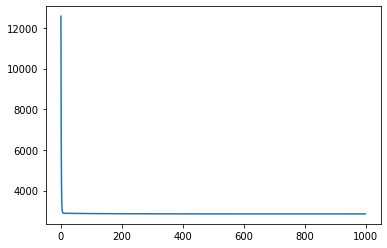

In [12]:
losses = []
last_losses = []

# LEARNING_RATE 여러개 시도
for i, LEARNING_RATE in enumerate(LEARNING_RATE_list): 
    
    W = np.random.rand(X_train.shape[1])
    b = np.random.rand()
   
    for ii in range(1,1001):
        dW, db = gradient(X_train, W, b, y_train)
        W -= LEARNING_RATE * dW
        b -= LEARNING_RATE * db
        L = loss(X_train, W, b, y_train)
        losses.append([LEARNING_RATE,L])
        if ii==1000: #1000:
            last_losses.append([LEARNING_RATE,L])        
        if ii % 100 == 0:
            print('Index %d Iteration %d : LEARNING_RATE  %0.5f  Loss %0.4f' % (i,ii, LEARNING_RATE, L))
   
print("losses[-100:]", losses[-100:], len(losses))    
print("last_losses", last_losses)  

# Best_LEARNING_RATE 선택 
Best_lr_loss =  [x for x in last_losses if x[1] == np.min([y[1] for y in last_losses])][0] 
Best_losses_list = [x[1] for x in losses if x[0] == Best_lr_loss[0]]
print("Best_lr_loss", Best_lr_loss,)
print("Best_LEARNING_RATE:", Best_lr_loss[0], "Min_Loss:,",Best_lr_loss[1] )


## plot
plt.plot(Best_losses_list)
plt.show()
            

## (10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [13]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print("prediction", prediction)
print("mse",mse)

prediction [-5.25782344  6.80748376 -5.75643055 10.04005491  6.4125502   3.69621538
 -2.39277491 -1.25019069 -3.75558132  3.76907181  7.46879443  6.14147142
 11.23861789  2.46723751  1.56795723  9.35480748  8.58297739 13.38454466
 -2.99738976  0.3076206   6.94713361  2.19978465  6.75207133  7.50671541
  4.69154411  8.8916651   6.52705561 -0.09680764  7.98770711  5.91669514
  5.52069685  7.50341185  7.59223717  5.58723839  8.6538916   0.45253798
  0.49298981 -6.53370692  4.29430192  9.19020127  2.31001821  6.88474385
  2.37097473 17.12689814 13.81135574 -0.6286262   7.4730397   5.00178417
  3.78134688  3.40328492 -4.74767944  5.93058319  2.68434468  2.10552272
 -9.15525079 -5.17124647  8.38210392  2.95291079  3.90595933 -1.98711725
 -3.20324322  1.21091324  4.16102362 -8.36871107 -0.68435077 -2.94073289
 -1.56382716  8.99791352  2.22490275  0.31821697  3.75379484 12.61277774
  2.17880593 -6.81048683  8.79472474  0.17816559 11.81349563  5.21260609
 10.61999088  7.72079429  8.43537352  4.

In [15]:
#prediction_inverselog = np.exp(prediction)
#prediction_inverselog

## (11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

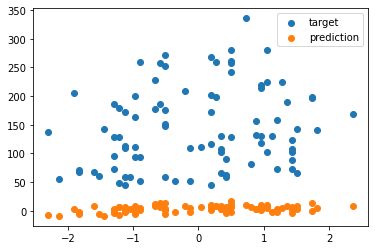

In [16]:
plt.scatter(X_test[:, 0], y_test, label='target')
plt.scatter(X_test[:, 0], prediction, label='prediction')
plt.legend()
plt.show()

In [ ]:
 ]

# 2.  [2-13. 프로젝트2_자전거대여량 예측]

### (1) 데이터 가져오기
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
여기에서 데이터를 상세히 확인할 수 있습니다.

In [1]:
import pandas as pd
import numpy as np
import os,sys

In [2]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape, train.head(),train.tail())
print(train.info())
print(train.describe())


(10886, 12)               datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1                     datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1  

### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : 링크 참조
pandas datetime extract year month day 키워드로 검색해 보기


In [3]:
train['datetime'] = pd.to_datetime(train['datetime'])
print(type(train['datetime'][0]))
print(train['datetime'][0])
train['year']= train['datetime'].dt.year
train['month']= train['datetime'].dt.month
train['day']= train['datetime'].dt.day  
train['hour']= train['datetime'].dt.hour
train['minute']= train['datetime'].dt.minute
train['second']= train['datetime'].dt.second

#월(0) 화(1) 수(2) 목(3) 금(4) 토(5) 일(6)
train['dayofweek'] = train['datetime'].dt.dayofweek
print(train.head())


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2011-01-01 00:00:00
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   

### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기


[----year----------------------]


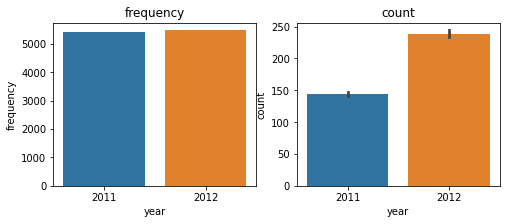


[----month----------------------]


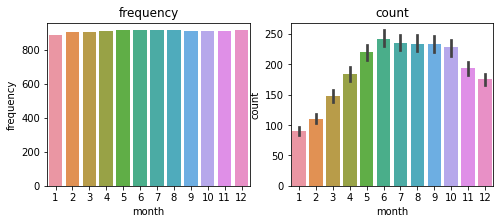


[----day----------------------]


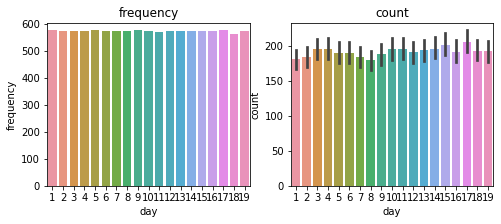


[----hour----------------------]


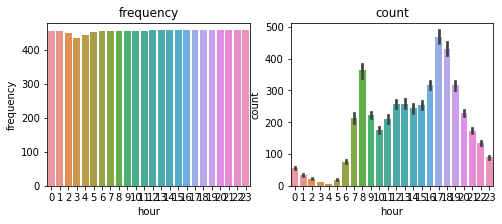


[----minute----------------------]


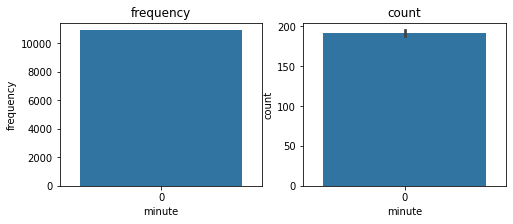


[----second----------------------]


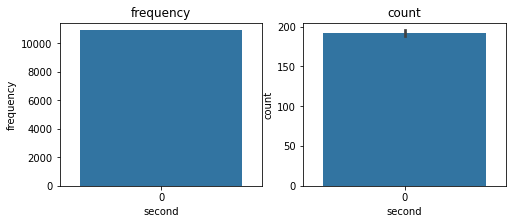

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

print('[----year----------------------]')
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)
sns.countplot(data = train, x ='year',ax = ax[0]) 
sns.barplot(data=train,x='year',y='count', ax = ax[1])
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')
plt.show()
print()

print('[----month----------------------]')
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)
sns.countplot(data = train, x ='month',ax = ax[0]) 
sns.barplot(data=train,x='month',y='count', ax = ax[1])
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')
plt.show()
print()

print('[----day----------------------]')
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)
sns.countplot(data = train, x ='day',ax = ax[0]) 
sns.barplot(data=train,x='day',y='count',ax = ax[1])
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')
plt.show()
print()

print('[----hour----------------------]')
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)
sns.countplot(data = train, x ='hour',ax = ax[0]) 
sns.barplot(data=train,x='hour',y='count',ax = ax[1])
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')
plt.show()
print()

print('[----minute----------------------]')
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)
sns.countplot(data = train, x ='minute',ax = ax[0]) 
sns.barplot(data=train,x='minute',y='count',ax = ax[1])
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')
plt.show()
print()

print('[----second----------------------]')
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)
sns.countplot(data = train, x ='second',ax = ax[0]) 
sns.barplot(data=train,x='second',y='count',ax = ax[1])
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')
plt.show()


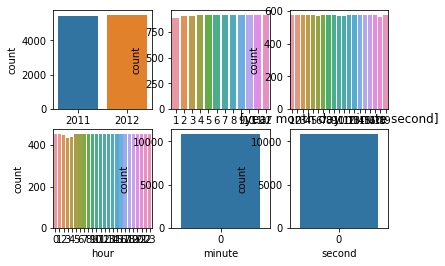

In [5]:
plt.subplot(2,3,1)
ax1 = sns.countplot(data = train, x ='year') 

plt.subplot(2,3,2)
ax1 = sns.countplot(data = train, x ='month') 

plt.subplot(2,3,3)
ax1 = sns.countplot(data = train, x ='day') 

plt.subplot(2,3,4)
ax1 = sns.countplot(data = train, x ='hour') 

plt.subplot(2,3,5)
ax1 = sns.countplot(data = train, x ='minute') 

plt.subplot(2,3,6)
ax1 = sns.countplot(data = train, x ='second') 

plt.title('[year month day minute second]')
plt.show()

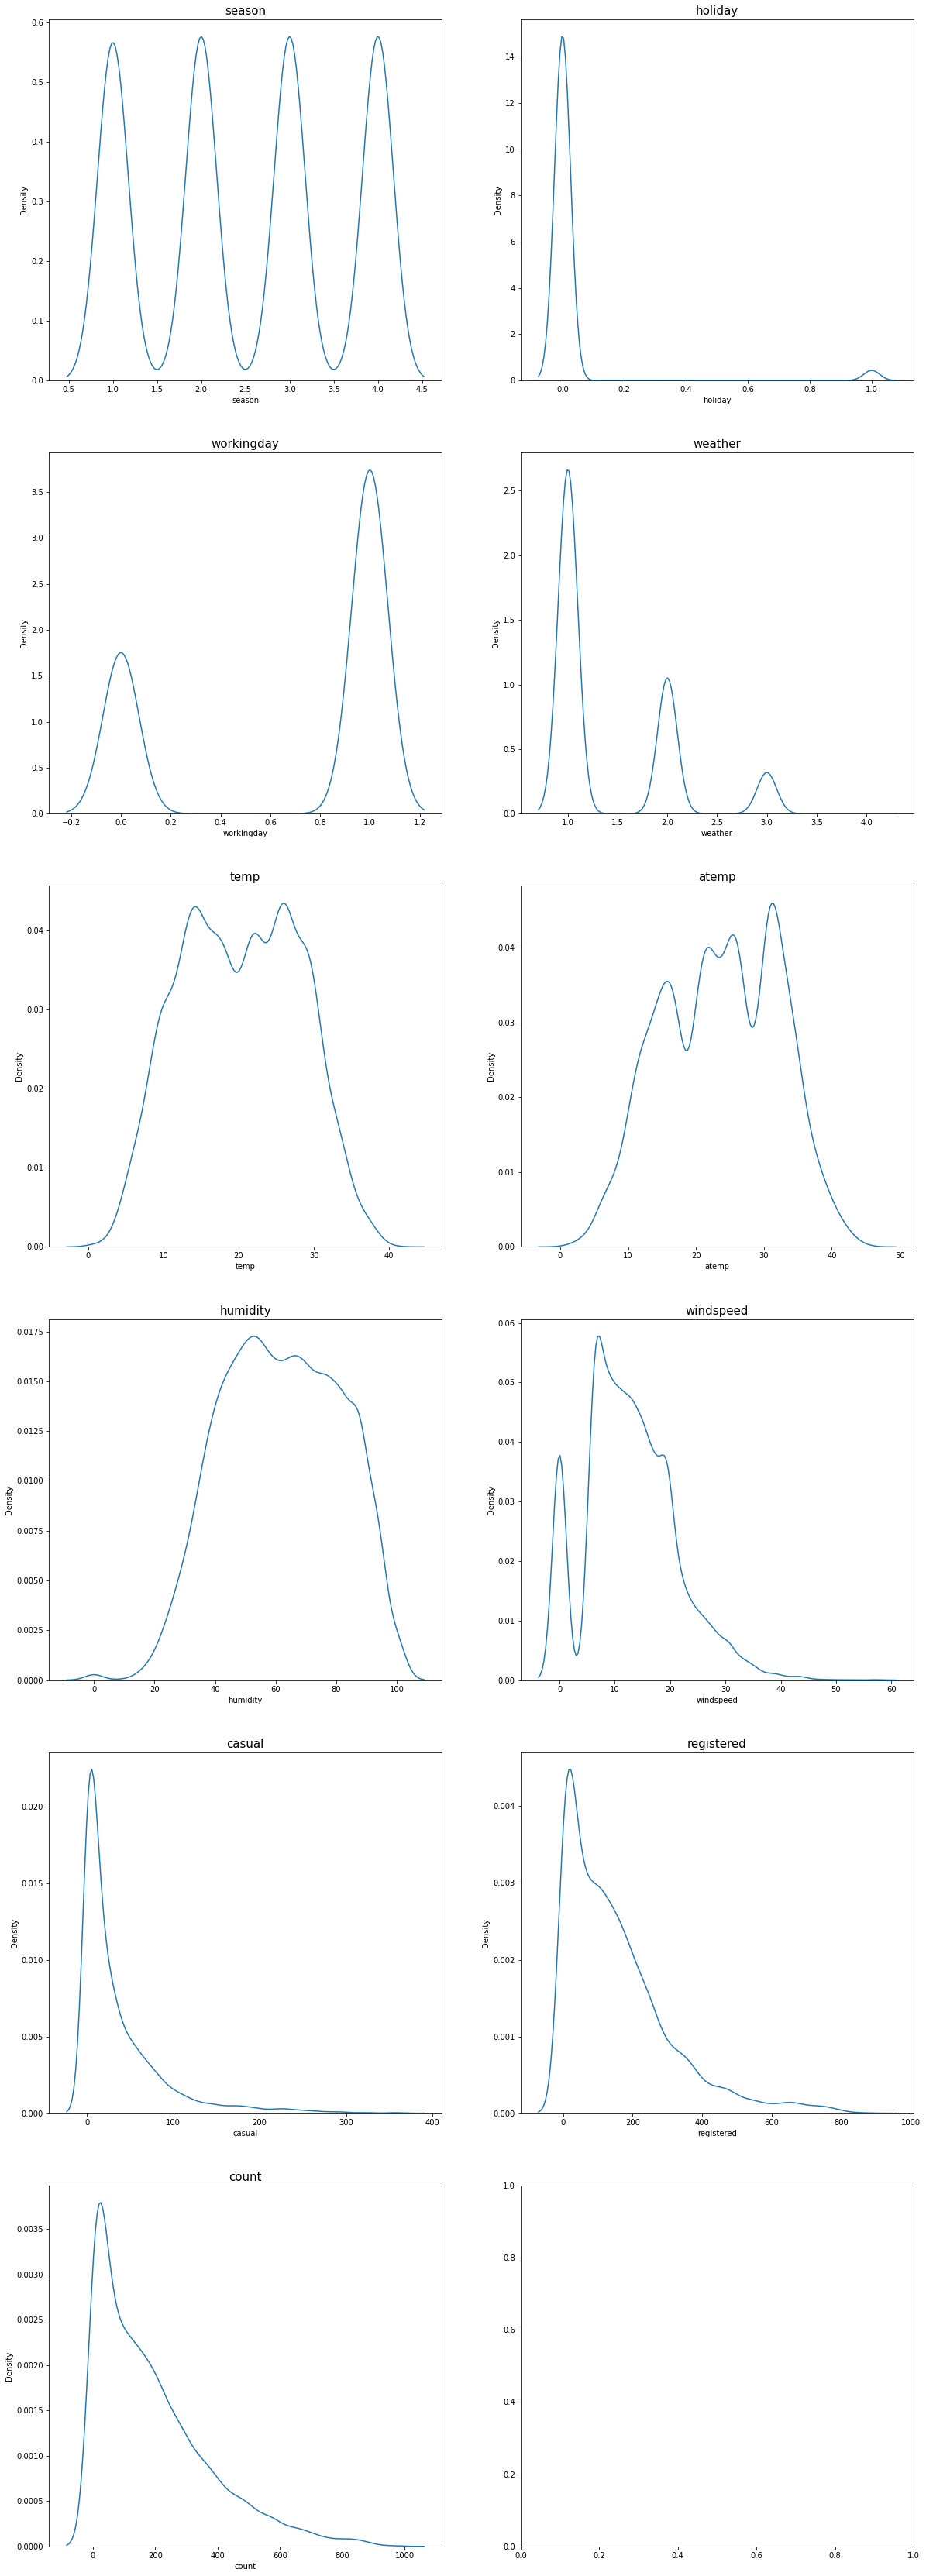

In [6]:
## 분포쏠림있나 확인 및 정규분포화

fig, ax = plt.subplots(6, 2, figsize=(20, 60))

# id 변수는 제외하고 분포를 확인합니다.
count = 0
columns = train.columns[1:]
for row in range(6):
    for col in range(2):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1
        if count == 11 :
            break

In [7]:
skew_columns = ['holiday', 'casual', 'registered', 'count']

for c in skew_columns:
    train[c] = np.log1p(train[c].values)

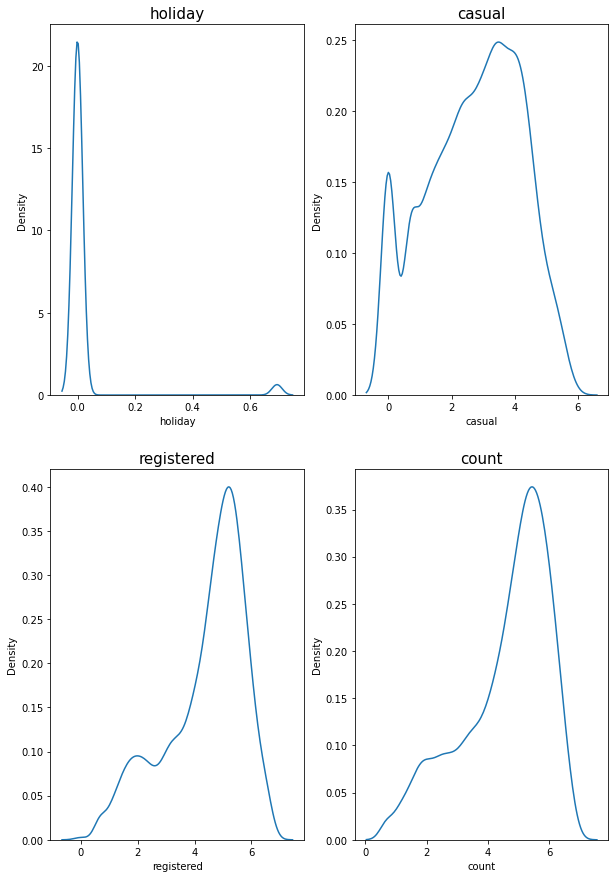

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10, 15))

count = 0
for row in range(2):
    for col in range(2):
        if count == 4:
            break
        sns.kdeplot(train[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1

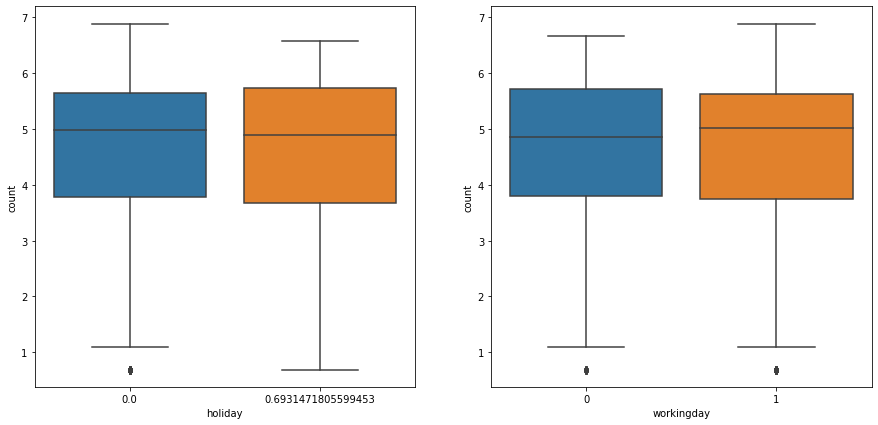

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
 
# holiday 와 workingday 의 boxplot
sns.boxplot(data=train, x='holiday', y='count', ax=ax[0])
sns.boxplot(data=train, x='workingday', y='count', ax=ax[1])
 
plt.show()

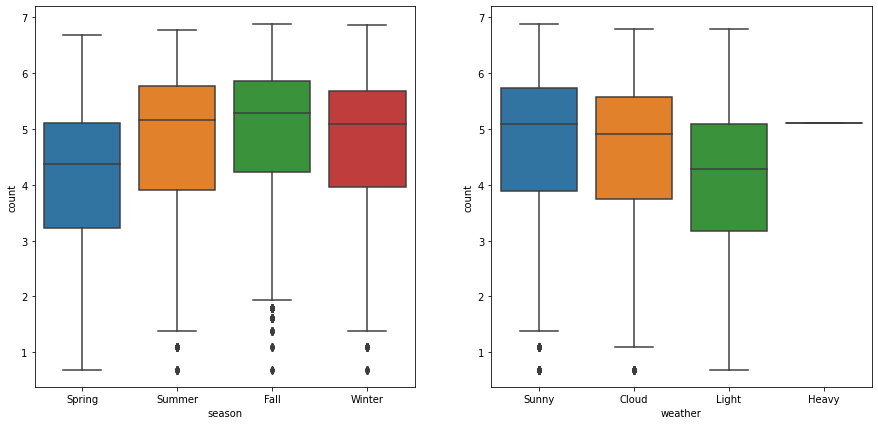

In [12]:
ig, ax = plt.subplots(1, 2, figsize=(15,7))
 
# season 와 weather 의 boxplot
sns.boxplot(data=train, x='season', y='count', ax=ax[0])
sns.boxplot(data=train, x='weather', y='count', ax=ax[1])
 
#x축 이름 변경
ax[0].set(xticklabels=['Spring', 'Summer', 'Fall', 'Winter'])
ax[1].set(xticklabels=['Sunny', 'Cloud', 'Light', 'Heavy'])
 
plt.show()

<AxesSubplot:>

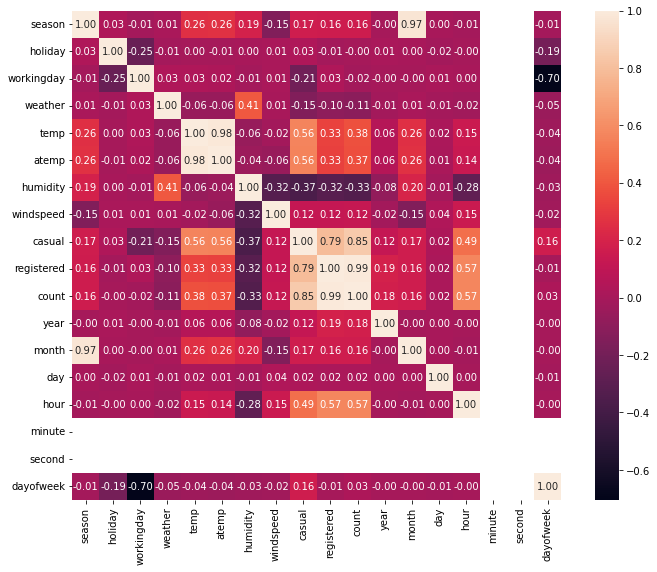

In [14]:
## 상관관계 히트맵1

corr_mat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, annot = True, fmt = '.2f', vmax = 1, square =True)

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count')]

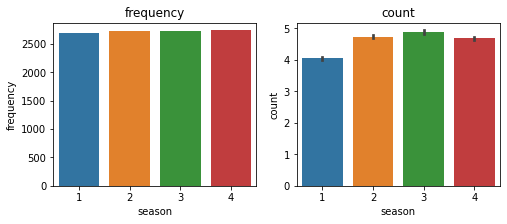

In [15]:
# season	봄(1) 여름(2) 가을(3) 겨울(4)
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)
sns.countplot(data = train, x = 'season',ax = ax[0]) 
sns.barplot(data = train, x = 'season', y = 'count',ax = ax[1]) 
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')

In [16]:
# 계절과 월의 교차표: 봄(1,2,3월), 여름(4,5,6),가을(7,8,9),겨울(10,11,12)
pd.crosstab(train['season'], train['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


<AxesSubplot:xlabel='hour', ylabel='count'>

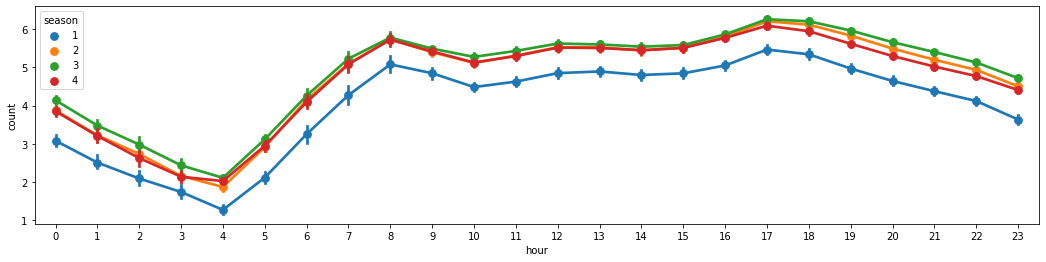

In [17]:
fig = plt.figure(figsize=(18,4))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season')

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count')]

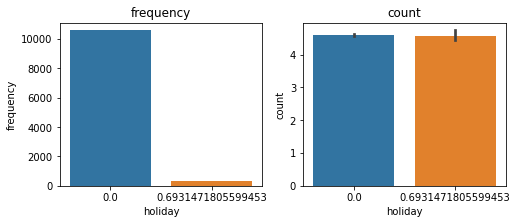

In [18]:
# Holiday	공휴일(1) 그외 근무일,주말(0)
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)
sns.countplot(data = train, x = 'holiday',ax = ax[0]) 
sns.barplot(data = train, x = 'holiday', y = 'count',ax = ax[1]) 
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')

<AxesSubplot:xlabel='hour', ylabel='count'>

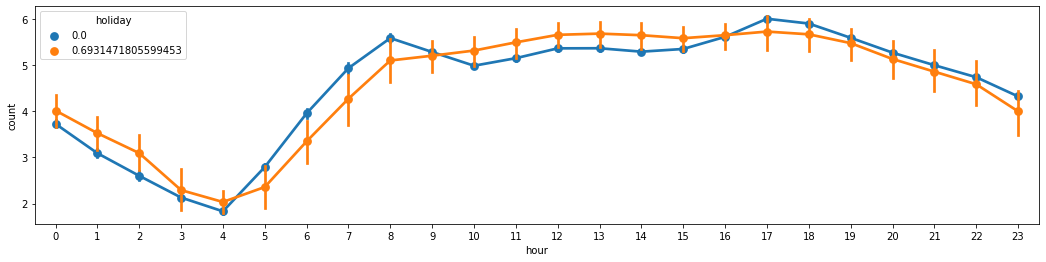

In [19]:
fig = plt.figure(figsize=(18,4))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday')

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count')]

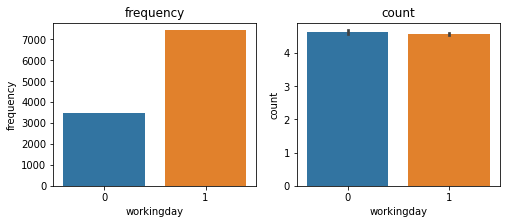

In [20]:
# Workingday	근무일(1) 그외 공휴일,주말(0)
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)
sns.countplot(data = train, x = 'workingday',ax = ax[0]) 
sns.barplot(data = train, x = 'workingday', y = 'count',ax = ax[1]) 
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')

<AxesSubplot:xlabel='hour', ylabel='count'>

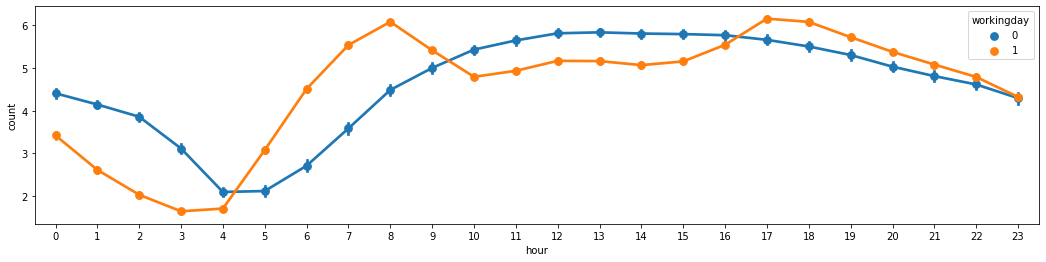

In [21]:
fig = plt.figure(figsize=(18,4))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday')

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count')]

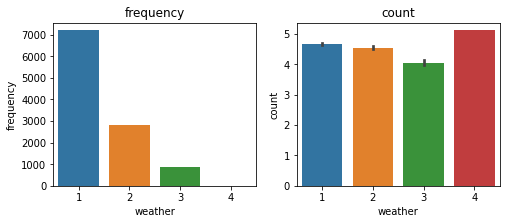

In [22]:
# weather	(1)아주 맑은날씨,(2)약간의 안개,구름,(3)약간의 눈,비,(4)아주많은비,우박(4)
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)
sns.countplot(data = train, x = 'weather',ax = ax[0]) 
sns.barplot(data = train, x = 'weather', y = 'count',ax = ax[1]) 
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')

<AxesSubplot:xlabel='hour', ylabel='count'>

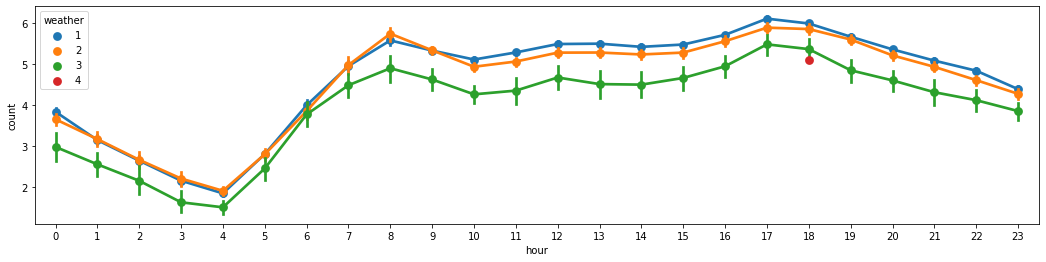

In [23]:
fig = plt.figure(figsize=(18,4))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count')]

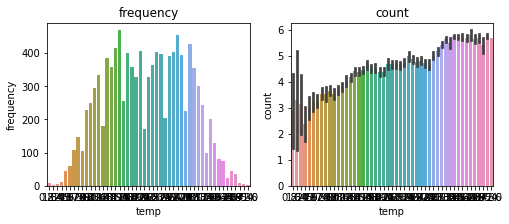

In [24]:
#Temp	온도(섭씨로 주어짐)
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

sns.countplot(data = train, x = 'temp',ax = ax[0]) 
sns.barplot(data = train, x = 'temp', y = 'count',ax = ax[1]) 
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')

<AxesSubplot:xlabel='hour', ylabel='count'>

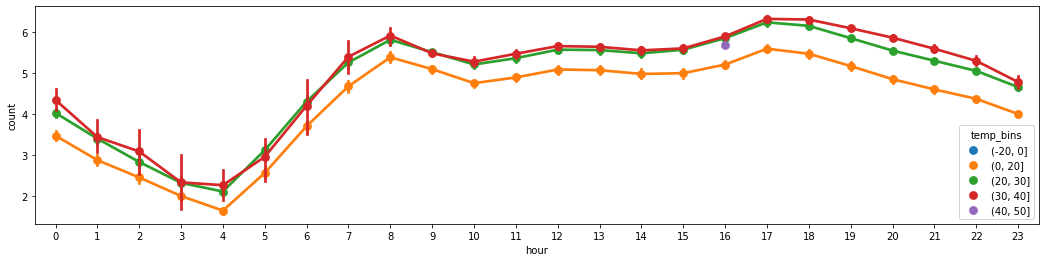

In [25]:
fig = plt.figure(figsize=(18,4))
bins = [-20, 0, 20, 30, 40, 50]
train['temp_bins'] = pd.cut(train['temp'], bins = bins)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'temp_bins')


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count')]

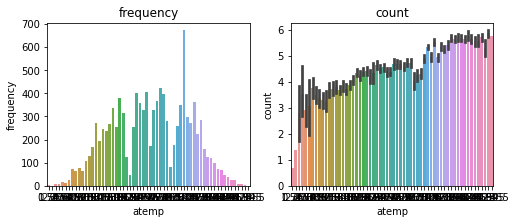

In [26]:
#atemp	체감온도(섭씨로 주어짐
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

sns.countplot(data = train, x = 'atemp',ax = ax[0]) 
sns.barplot(data = train, x = 'atemp', y = 'count',ax = ax[1]) 
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')


<AxesSubplot:xlabel='hour', ylabel='count'>

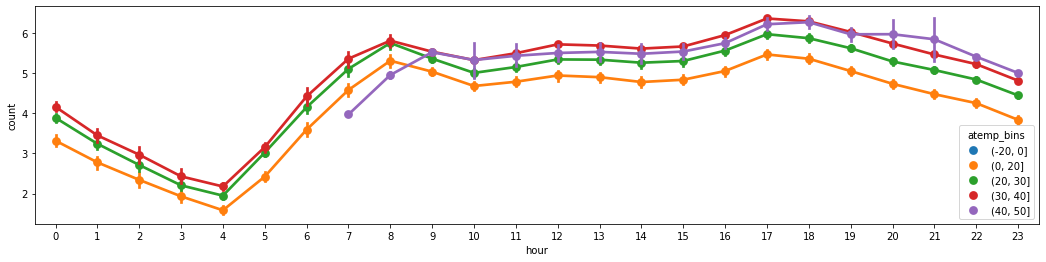

In [27]:
fig = plt.figure(figsize=(18,4))
bins = [-20, 0, 20, 30, 40, 50]
train['atemp_bins'] = pd.cut(train['atemp'], bins = bins)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'atemp_bins')


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count')]

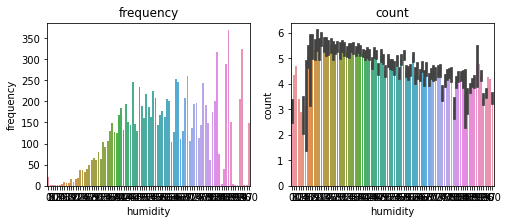

In [28]:
# humidity	습도
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

sns.countplot(data = train, x = 'humidity',ax = ax[0]) 
sns.barplot(data = train, x = 'humidity', y = 'count',ax = ax[1]) 
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')


In [29]:
bins = [0, 10, 20, 30, 40, 60]
train['windspeed_bins'] = pd.cut(train['windspeed'], bins = bins)
print(train['windspeed_bins'].value_counts())

(10, 20]    5052
(0, 10]     3026
(20, 30]    1068
(30, 40]     387
(40, 60]      40
Name: windspeed_bins, dtype: int64


<AxesSubplot:xlabel='hour', ylabel='count'>

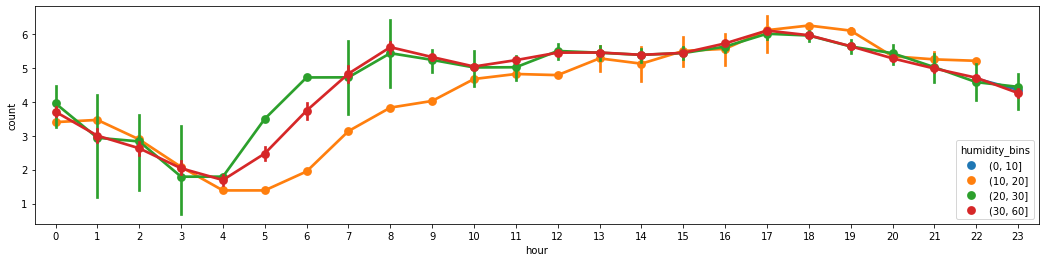

In [30]:
fig = plt.figure(figsize=(18,4))
bins = [0, 10, 20, 30, 60]
train['humidity_bins'] = pd.cut(train['humidity'], bins = bins)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'humidity_bins')


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count')]

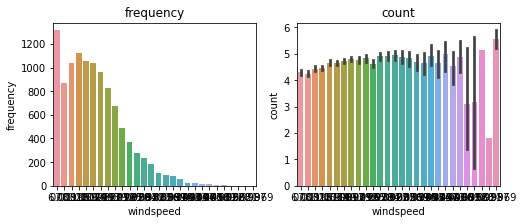

In [31]:
#Windspeed	풍속
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

sns.countplot(data = train, x = 'windspeed',ax = ax[0]) 
sns.barplot(data = train, x = 'windspeed', y = 'count',ax = ax[1]) 
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')


<AxesSubplot:xlabel='hour', ylabel='count'>

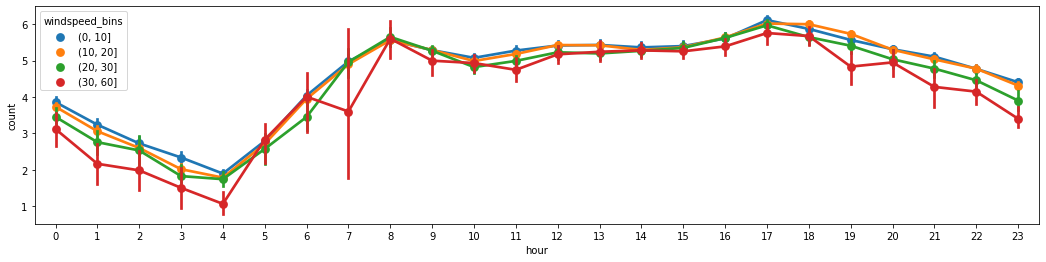

In [32]:
fig = plt.figure(figsize=(18,4))
bins = [0, 10, 20, 30, 60]
train['windspeed_bins'] = pd.cut(train['windspeed'], bins = bins)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'windspeed_bins')


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count')]

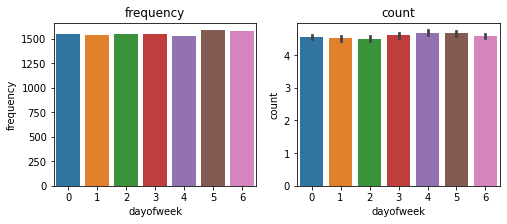

In [33]:
# dayofweek : 요일추가, Monday=0, Sunday=6.
train['dayofweek'] = train['datetime'].dt.dayofweek

fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

sns.countplot(data = train, x = 'dayofweek',ax = ax[0]) 
sns.barplot(data = train, x = 'dayofweek', y = 'count',ax = ax[1]) 
ax[0].set(ylabel='frequency',title='frequency')
ax[1].set(ylabel='count',title='count')


<AxesSubplot:xlabel='hour', ylabel='count'>

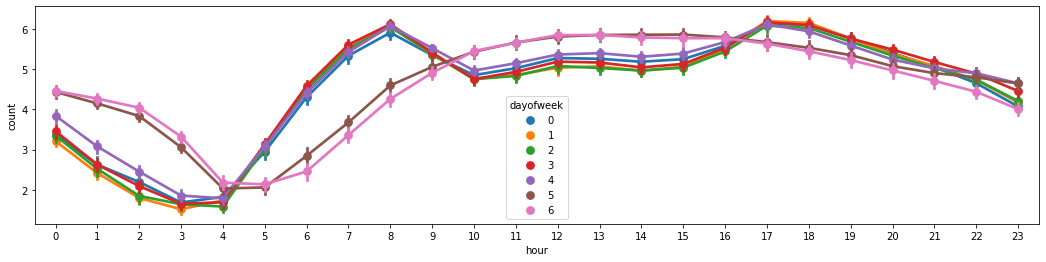

In [34]:
fig = plt.figure(figsize=(18,4))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek')


In [35]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'temp_bins', 'atemp_bins', 'windspeed_bins', 'humidity_bins'],
      dtype='object')

In [36]:
# train 범주형데이터 one-hot-encoding
import copy

temp_dummy= pd.get_dummies(train, columns= ['season','weather','dayofweek','month', 'day', 'hour'])
print(temp_dummy.shape)
train_extend = copy.deepcopy(temp_dummy)

# 사본저장
train_root = copy.deepcopy(train_extend)

# 불필요컬럼 삭제' casual', 'registered',
#train_extend.drop([casual','registered','temp', temp_bins', 'atemp_bins', 'windspeed_bins', 'humidity_bins', 'minute', 'second'],axis = 1,inplace = True)
train_extend.drop(['holiday','casual','registered','temp_bins', 'atemp_bins', 'windspeed_bins', 'humidity_bins','year', 'minute', 'second'],axis = 1,inplace = True)
print(train_extend.shape)  
print(train_extend.shape)  

# datatime을 인덱스로 설정
train_extend.set_index('datetime', drop = True, inplace = True)
print(train_extend.shape, train_extend.columns)            

(10886, 87)
(10886, 77)
(10886, 77)
(10886, 76) Index(['workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'count',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'dayofweek_0', 'dayofweek_1',
       'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5',
       'dayofweek_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object'

In [37]:
## 데이터전처리 1 : null 데이터 전혀없어서, nan 처리필요없슴
print(train_extend.isnull().sum().sum())
#print(test_extend.isnull().sum().sum())

0


In [38]:
from sklearn.model_selection import train_test_split
import numpy as np

print(train_extend.columns)
## target data 
y=train_extend['count']
print("y.isnull().sum()",y.isnull().sum())


Index(['workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'count',
       'season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'dayofweek_0', 'dayofweek_1',
       'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5',
       'dayofweek_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')
y.isnull().sum() 0


'\n# target data를 log로 정규화시도:  target data를 log 처리 \nlog_y = y.map(lambda x: np.log(x) if x > 0 else 0)\nprint("log_y.isnull().sum()",log_y.isnull().sum())\ny = log_y.values\nprint(y)\nprint()\n'

In [39]:
## train data 
train_extend.drop('count',axis = 1, inplace=True)
X = train_extend.values

## train, test 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8708, 75) (8708,)
(2178, 75) (2178,)


In [40]:
# 데이터 정규화: 표준화
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler() #StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train[:1], X_test[:1])


### (5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기


In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# 학습
model.fit(X_train,y_train)

model.score(X_train,y_train)

0.8110750193654066

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse 값과 함께 rmse 값도 계산하기


In [42]:
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error

# y_test 및 predictions를 환원후 평가 : log ==> np.exp()
y_test = np.expm1(y_test)
predictions = np.expm1(predictions)
mse = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mse)
print("RMSE:",RMSE)

RMSE: 111.00370339634084


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

['workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'dayofweek_0', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'] 1


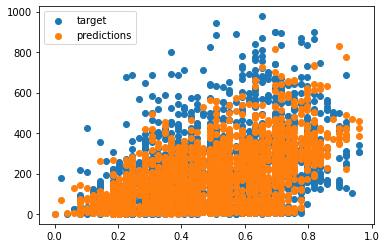

3


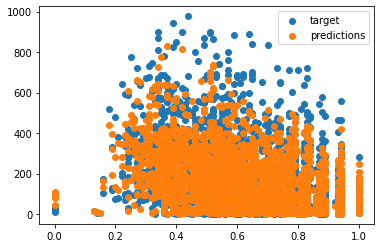

In [43]:
# temp data
temp_index = train_extend.columns.tolist().index('temp')
print(train_extend.columns.tolist(), temp_index)
plt.scatter(X_test[:, temp_index], y_test, label='target')
plt.scatter(X_test[:, temp_index], predictions, label='predictions')
plt.legend()
plt.show()

# humidity data
humidity_index = train_extend.columns.tolist().index('humidity')
print(humidity_index)
plt.scatter(X_test[:, humidity_index], y_test, label='target')
plt.scatter(X_test[:, humidity_index], predictions, label='predictions')
plt.legend()
plt.show()

<AxesSubplot:>

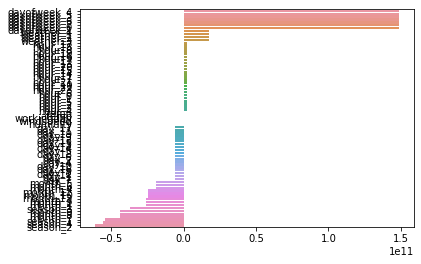

In [44]:
# 회귀계수 체크
coef = pd.Series(model.coef_, index = train_extend.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)



In [46]:
### RMSE
print("RMSE:",RMSE)

RMSE: 111.00370339634084


# 3. [회고]

### (1) 당뇨병 수치 예측  회고

train data 학습시 learning rate을 for loop를 통해 여러개 변경시켜보니, 학습율 0.2가 가장 괜찮은 편이었슴,
학습중 loss곡선은 100 epoch도 않되어 곧바로 minimize되어,그이후 los는 2800대에서 수렴되었슴,

학습 MSE는 learning rate 0.2에,MSE 2849 로 수렴되었지만, 예상보다 높게 나왔슴

이는 train data와 target data의 scale이 다른 것에 기인한다고 보이는데, target data를 log를 취해서
정규화해봐도 결과는 해석상 정연하지 않음, 그래서, log취하지 않고 진행함

학습된 모델을 test data로 predict해서, MSE를 계산해보면 24417, RMSE 156으로 너무 크게 나타남.

이는 train data와 target data의 scale이 다른 것과 시간상 feature engineering를 못하고, 이상치제거를 못한 것이 원인인 듯
좀 더 숙련이되면, 빠른 시간내에 정확도를 높일수 있는 많은 것들을 시도해 보고 싶음

### (2) 자전거 대여량 예측 회고

EDA 공부겸 feature에대해 시각화를 많이 해보았슴.

season,weather,temp, humidity,wind speed, hour 등 범주형데이터가 많은 편이라, 데이터를 대부분 시각화해서, 분포가 한쪽으로 치우친 'holiday', 'casual', 'registered' 와 target data인 'count'등은 log를 취해서, 정규분포화했슴, 그리고, 범주형인 'season','weather','dayofweek' 은 one hot encoding했고, 
연속형변수가 아닌, 'month', 'day', 'hour' 를 역시 one hot encoding 했는데, hour의 one hot encoding이 RMSE 를 160에서, 111로 향상시켰는데, 어떤 이유에서 인지 파악은 못했슴   
workingday 는 holiday와 별차이가 않나는 것으로 나와서, 제외했고, 같은 이유로 year도 제외했슴.

이렇게 해서, feature정리를슴끝내고, Minmaxscaler로 정규화(Standardscaler보다 RMSE상 좀더 유리)하고 학습을 시켰슴.
에측치 RMSE는 111.004 수준이 나왔슴.

시간이 좀 더 있으면, 이상치제거도 해보고 싶었는데, 익숙지 않은 관계로 시간이 부족하여 다음과제에서 연습해 볼 예정임. 
